# Project 3
## We will create a predective model to know which customer will buy a loan
### Let us import all the required libraries

In [134]:
import numpy as np
import pandas as pd

%matplotlib inline 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [135]:
# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

# To build sklearn model
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

## Let us  read csv file into variable dt

In [86]:
dt = pd.read_csv("Loan_Modelling.csv")

In [87]:
# copying data to another variable to avoid any changes to original data
data = dt.copy() 

## Let us do some data exploration to get insights into various variables


In [88]:
data.head() # Let us read top 5 rows of the data set

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [89]:
data.tail() # Let us see last 5 rows of data set

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [90]:
data.shape # Let us check number of rows and columns in data

(5000, 14)

## Looks like we have 14 variables and no data seems to be missing in last and first few rows.
## We have about 5000 rows and 14 columns

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## We don't have any missing values across any variables and all variables are of integer type and CCAVG is of float type

In [92]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


## variable  ID has mean and median are same and data is looks normal
## Variable age is also normal as mean and median are extremely close
## Variable Experience is also normal as mean and median are extremely close and min value is suspiciously error
## Variable Income is left skewed normal as mean and median are extremely close
## looks like all zip codes  are all from california region
## Family variable is slightly right skewed
## CCAvg variable is right skewed
## Education is left skewed
## Mortgage is right skewed
## personal, Loan, Securities_Account, Cd_Account, Online, Credit_card seems to be mor of boolean varaibles and have ame minimum and maximum vlaues

In [93]:
data.isnull().sum().sort_values(ascending=False) # Let us confirm to see if we have any missing values

CreditCard            0
Online                0
CD_Account            0
Securities_Account    0
Personal_Loan         0
Mortgage              0
Education             0
CCAvg                 0
Family                0
ZIPCode               0
Income                0
Experience            0
Age                   0
ID                    0
dtype: int64

In [94]:
n_true = len(data.loc[data['Personal_Loan'] == True])
n_false = len(data.loc[data['Personal_Loan'] == False])
print("Number of Loan holders: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of non Loan holders: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of Loan holders: 480 (9.60%)
Number of non Loan holders: 4520 (90.40%)


# Univariate Analysis

In [39]:
data['Personal_Loan'].value_counts() # Let us look into Personal loan variable unique counts

0    4520
1     480
Name: Personal_Loan, dtype: int64

## we will be using personal loan for dependent variable. 480 customers of 5000 have taken personal loan that is about 9.6%

In [40]:
data['Education'].value_counts() # Count unique values across Education 

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [41]:
data['Securities_Account'].value_counts() # Count unique values across securities_Account

0    4478
1     522
Name: Securities_Account, dtype: int64

In [42]:
data['CD_Account'].value_counts()  # Count unique values across CD_Account

0    4698
1     302
Name: CD_Account, dtype: int64

In [43]:
data['Online'].value_counts() #  # Count unique values across online

1    2984
0    2016
Name: Online, dtype: int64

In [44]:
data['CreditCard'].value_counts()  # Count unique values across CreditCard 

0    3530
1    1470
Name: CreditCard, dtype: int64

In [45]:
data['Family'].value_counts() # Count unique values across Education 

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [46]:
#Let us change few of variables to categorical type
data["CreditCard"] = data["CreditCard"].astype("category") # convert CrediCard variable to category type
data["Family"] = data["Family"].astype("category") # convert Family variable to category type
data["Online"] = data["Online"].astype("category") # convert Online variable to category type
data["CD_Account"] = data["CD_Account"].astype("category") # convert CD_Account variable to category type
data["Securities_Account"] = data["Securities_Account"].astype("category")# convert Securities_Account variable to category type
data["Education"] = data["Education"].astype("category") # convert Education variable to category type
data["Personal_Loan"] = data["Personal_Loan"].astype("category") # convert Personal_Loan variable to category type

In [47]:
data['Experience'].value_counts() # Count unique values across Experience

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 39     85
 2      85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [75]:
data['Age'].value_counts()  # Count unique values across Age

35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
59    132
57    132
51    129
60    127
45    127
46    127
42    126
40    125
31    125
55    125
62    123
29    123
61    122
44    121
32    120
33    120
48    118
38    115
49    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64

## Age, Experience have too many unique values and it wouldn't be reasonable to convert the variables to category type

In [69]:
# Let us use the function to plot boxplot and histogram of non categorical data
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='skyblue') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'Orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

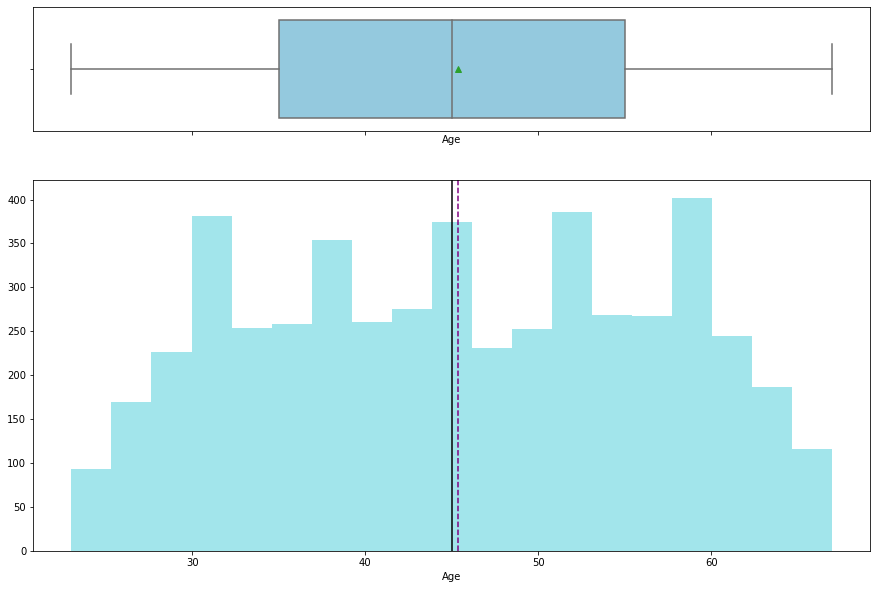

In [70]:
histogram_boxplot(data.Age) # Plot boxplot and hitogram of Age variable

### Data is normal as mean and median lie extremely close to one another ranging 20 to 70 years

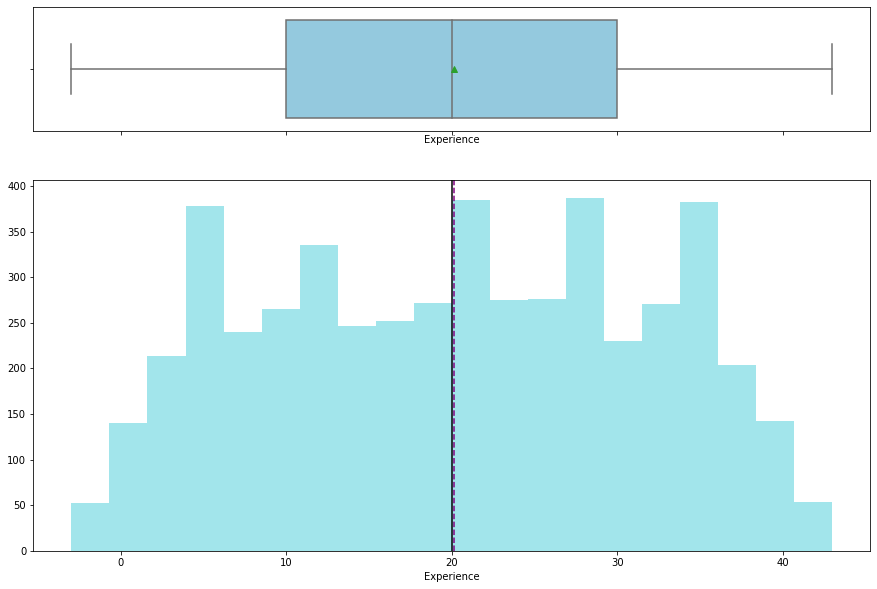

In [71]:
histogram_boxplot(data.Experience) # Plot histogram and boxplot of Experience

# Experience is normal as mean and median lie extremely close to one another at about 20 years.

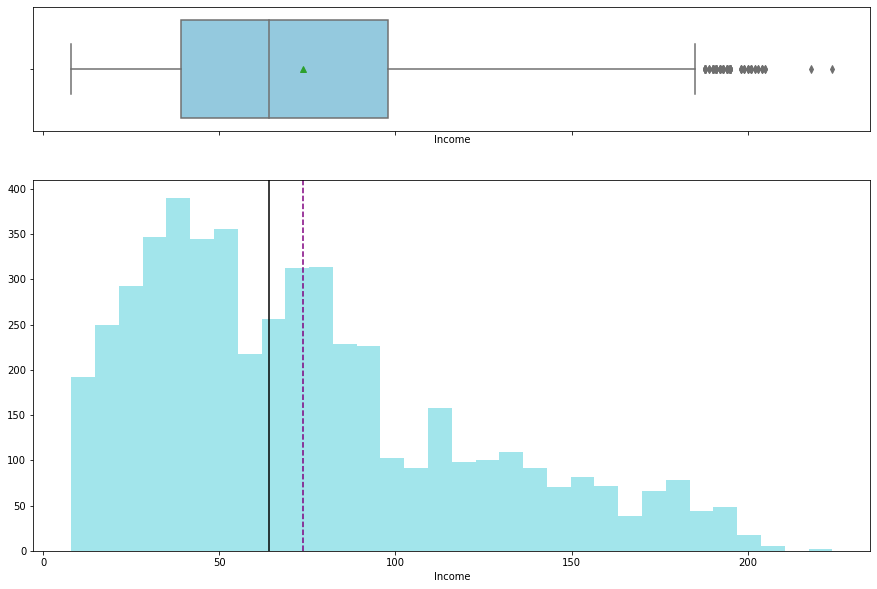

In [72]:
histogram_boxplot(data.Income)# Plot boxplot and hitogram of Income variable

# Income is right skewed and mean and median lieng at75 and 65.

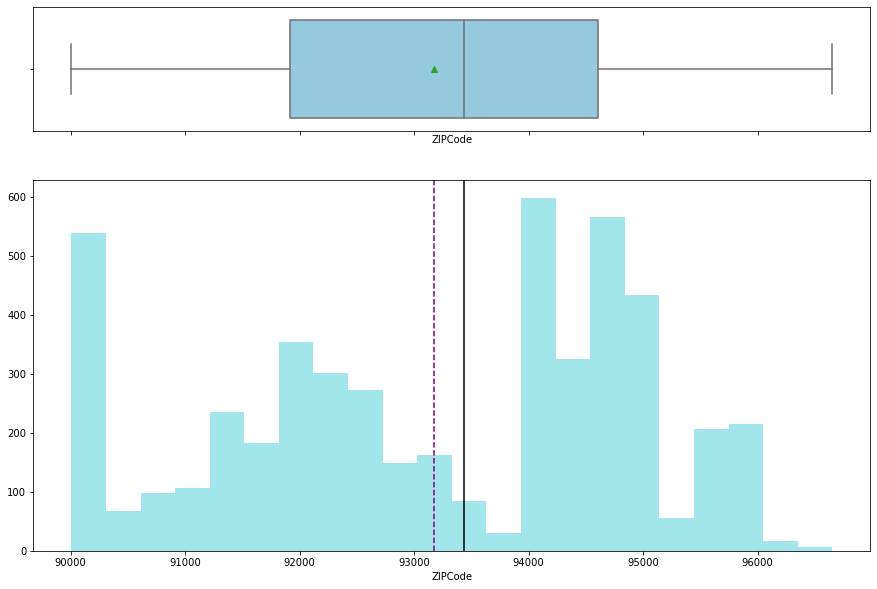

In [73]:
histogram_boxplot(data.ZIPCode) # Plot boxplot and hitogram of zip code variable

# Few zip codes  from 94000 and 95000 definitely have lot of customers. All data is from california zipcode

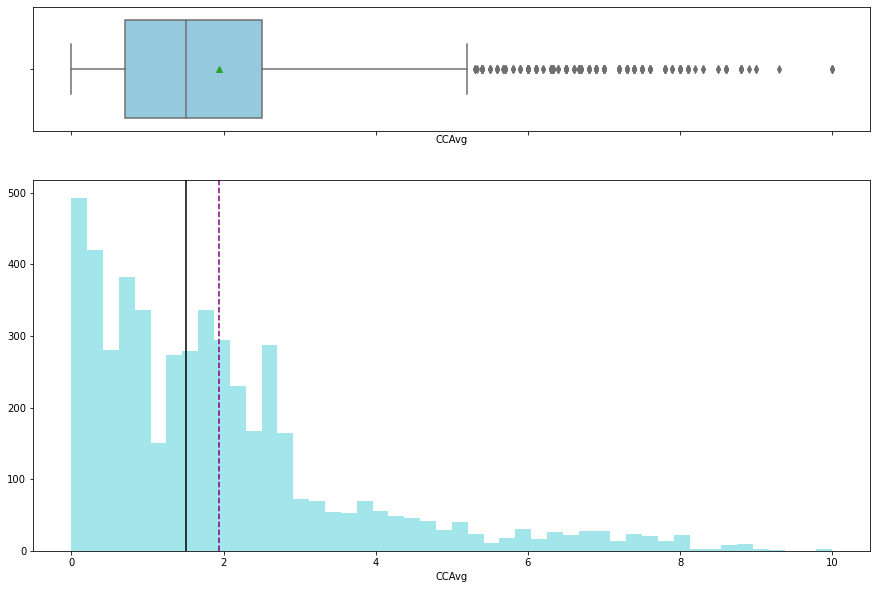

In [76]:
histogram_boxplot(data.CCAvg) # Plot boxplot and hitogram CCAvg

## CCAVG variable is extremely right skewed and mean and median are under 2

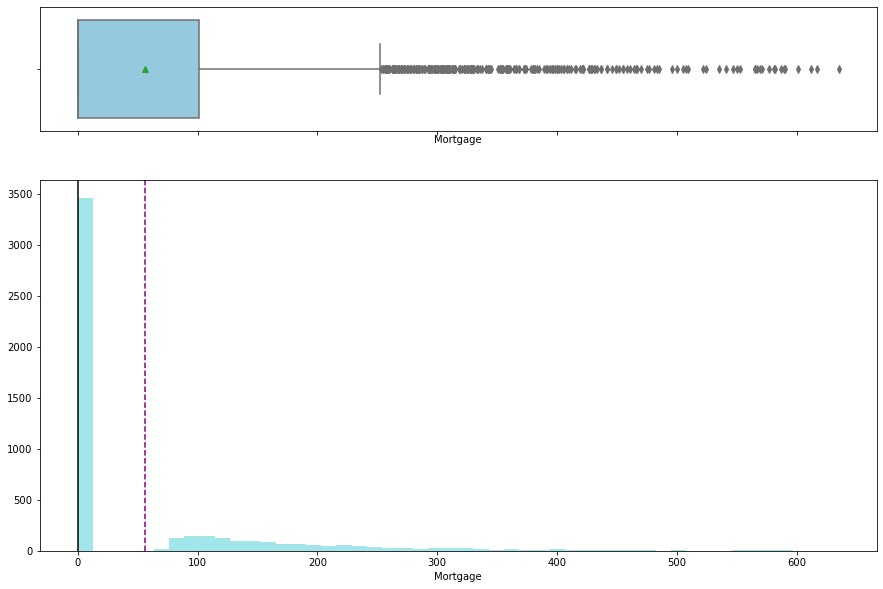

In [77]:
histogram_boxplot(data.Mortgage)

## Mortgage is right skewed and it will be right skewed if we considered only plot of people taking mortgage

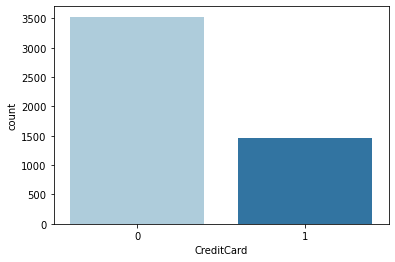

In [79]:
sns.countplot(data.CreditCard,palette='Paired')# Bargraph for categorical variable Credit card

## We have 30% of customers having credit card

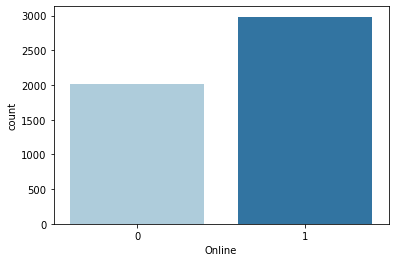

In [80]:
sns.countplot(data.Online,palette='Paired') # Bargraph for categorical variable Online

## We have majority of them using online platform roughly about 60%

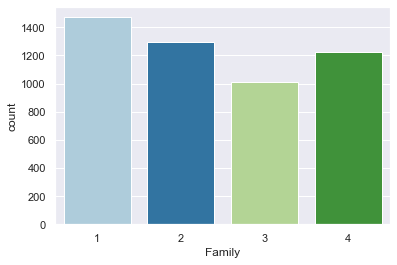

In [203]:
sns.countplot(data.Family,palette='Paired')

## Most of the customers are single or family of 2 and we capture all the customers if we restrict family less than or equal to 4

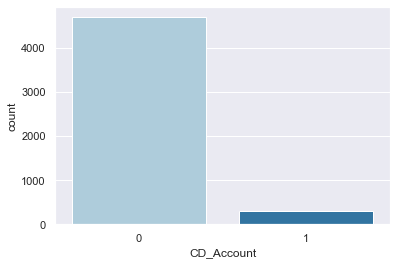

In [204]:
sns.countplot(data.CD_Account,palette='Paired')

## Very few customer have CD account roughy about 6%

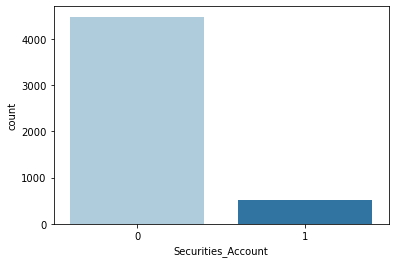

In [81]:
sns.countplot(data.Securities_Account,palette='Paired')

## Very few customer haveSecurities account roughy about 10%

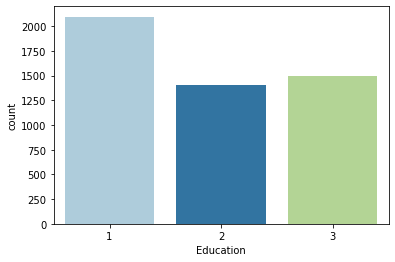

In [82]:
sns.countplot(data.Education,palette='Paired')

## We have 3 levels in education and majority of customers are categorised level 1.

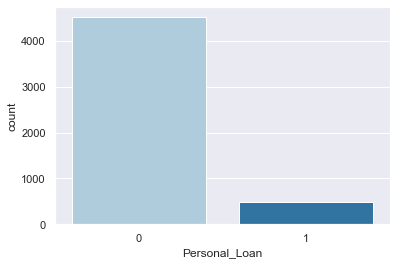

In [207]:
sns.countplot(data.Personal_Loan,palette='Paired')

## About 9.6% of people had personal loans

In [208]:
### Function to plot stacked bar charts for categorical columns with hue across dependent variable Personal Loan
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Personal_Loan'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Personal_Loan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


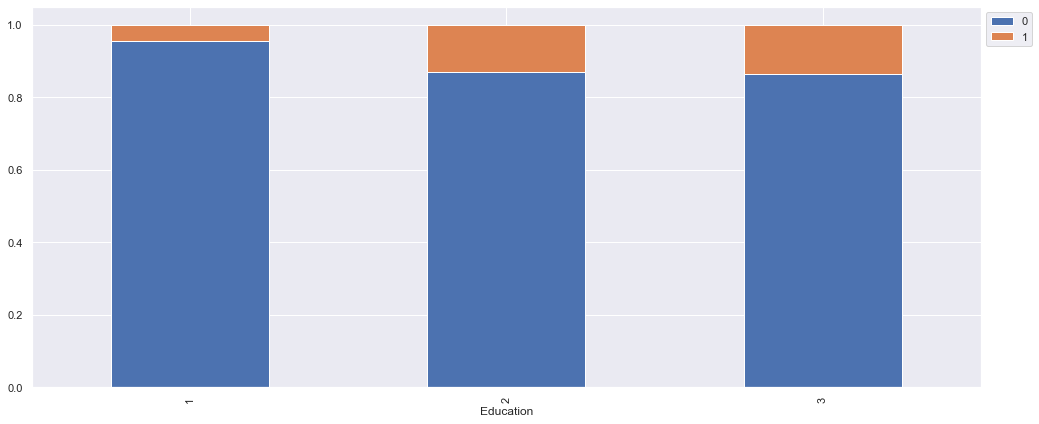

In [209]:
stacked_plot(data['Education'])

## Level 2 and Level 3 education tend to buy more personal Loan than level 1

Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
------------------------------------------------------------------------------------------------------------------------


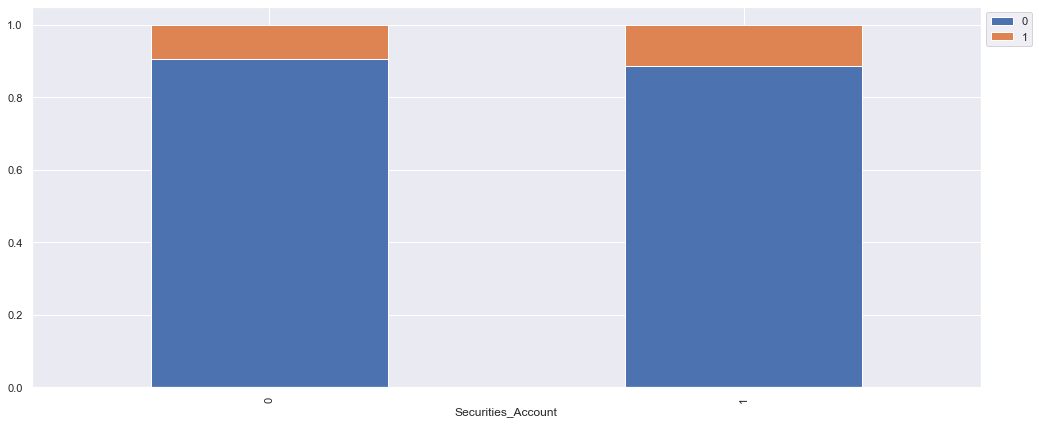

In [210]:
stacked_plot(data['Securities_Account']) # stacked plot of securities account hue by personal loan

## Security account holder tend to have personal loan compared to non security account holder

Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


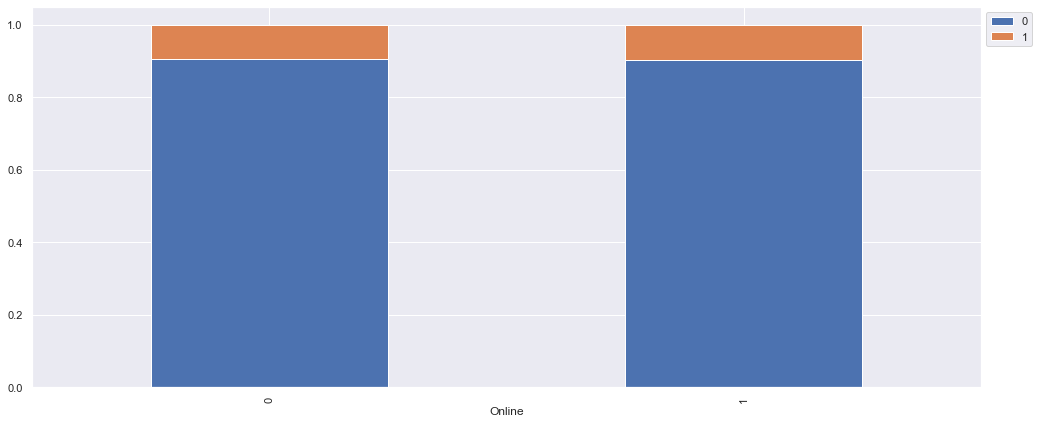

In [211]:
stacked_plot(data['Online'])  # stacked plot of online account hue by personal loan

## Online doesn't have any trend with Personal Loan

Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


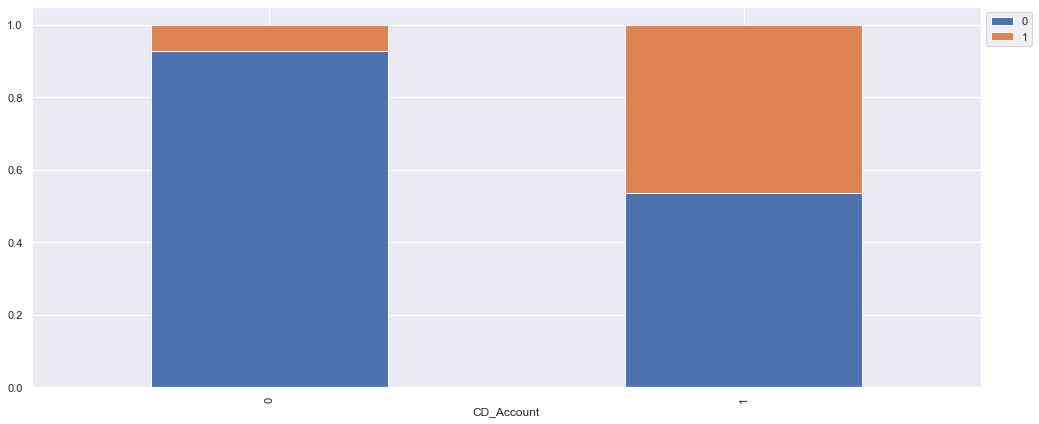

In [212]:
stacked_plot(data['CD_Account']) # stacked plot of CD_Account hue by personal loan

## CD account holder tend to definitely have personal loan compared to non CD account holder

Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


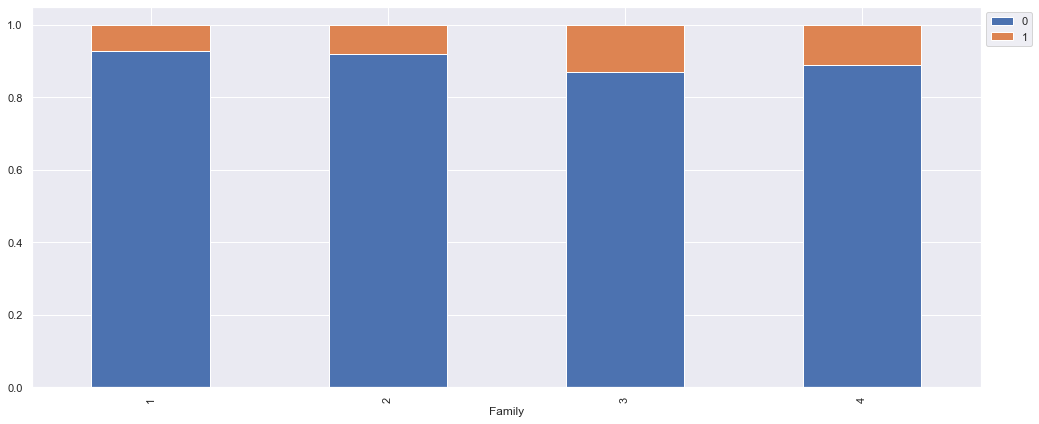

In [213]:
stacked_plot(data['Family'])  # stacked plot of Family hue by personal loan

## Family of 3 or 4 tend to have more personal loan compared to family of 1 and 2

Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
------------------------------------------------------------------------------------------------------------------------


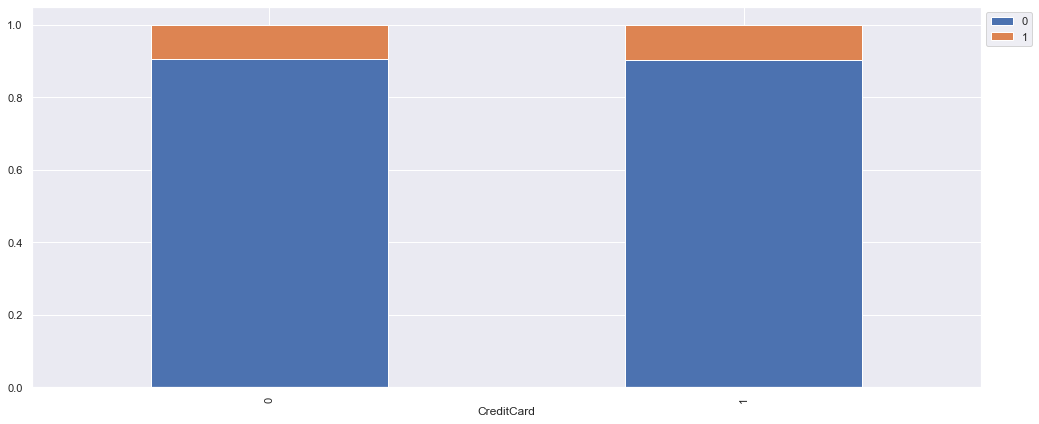

In [214]:
stacked_plot(data['CreditCard'])  # stacked plot of Credit Card hue by personal loan

## Credit Card hloder customers doesn't have any trend with Personal Loan

# MutiVariate Analysis

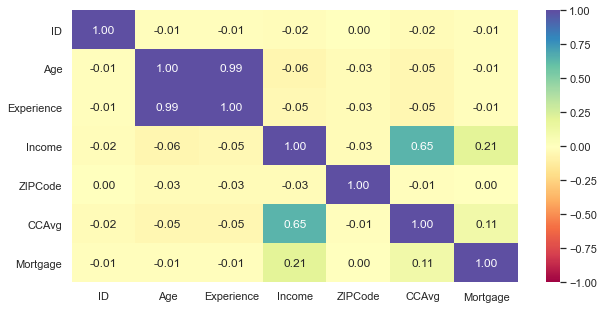

In [215]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral') # Heatmap of correlation matrix of various variables
plt.show()

## Experience and Age are extremely highly correlated of 0.99
## CCAvg have positive 0.65 correlation and Income and mortgage have positive correlation of 0.21
## Rest of variables don't have any correlation trends

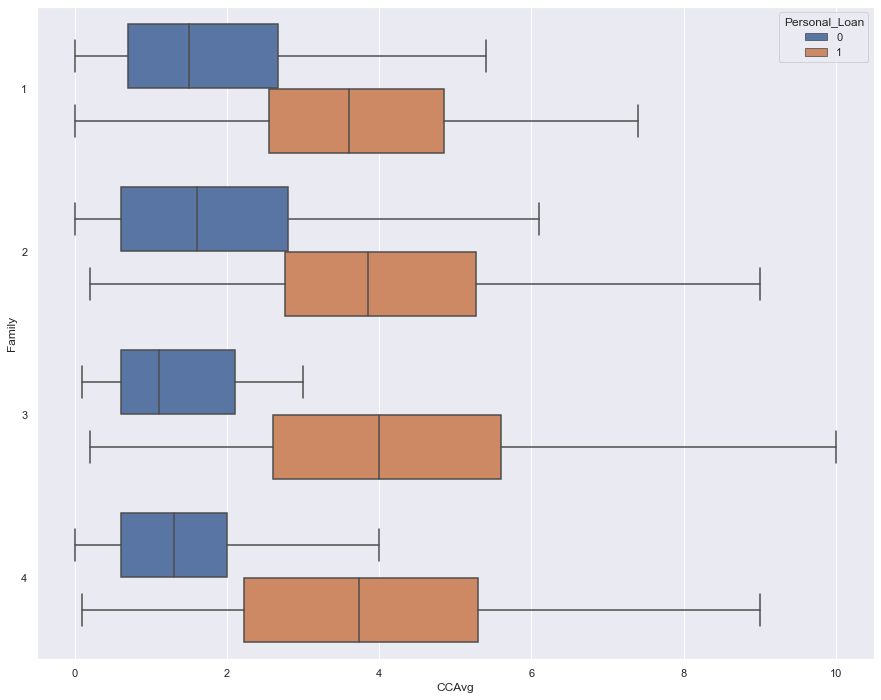

In [216]:
# lets see how family CCAVG and Personal Loan are related
plt.figure(figsize=(15,12))
sns.boxplot(y="Family", x="CCAvg", data=data,hue='Personal_Loan',showfliers=False);

## Personal Loan customers tend to have higher CCAvg with  median close to 4
## Customers without Personal loan have CCAvg median close to2 or less than 2
## Family of 3 and 4 have slightly more personal holders and CCAvg is high
## Family of 3 with personal Loans have highest range of CCAvg

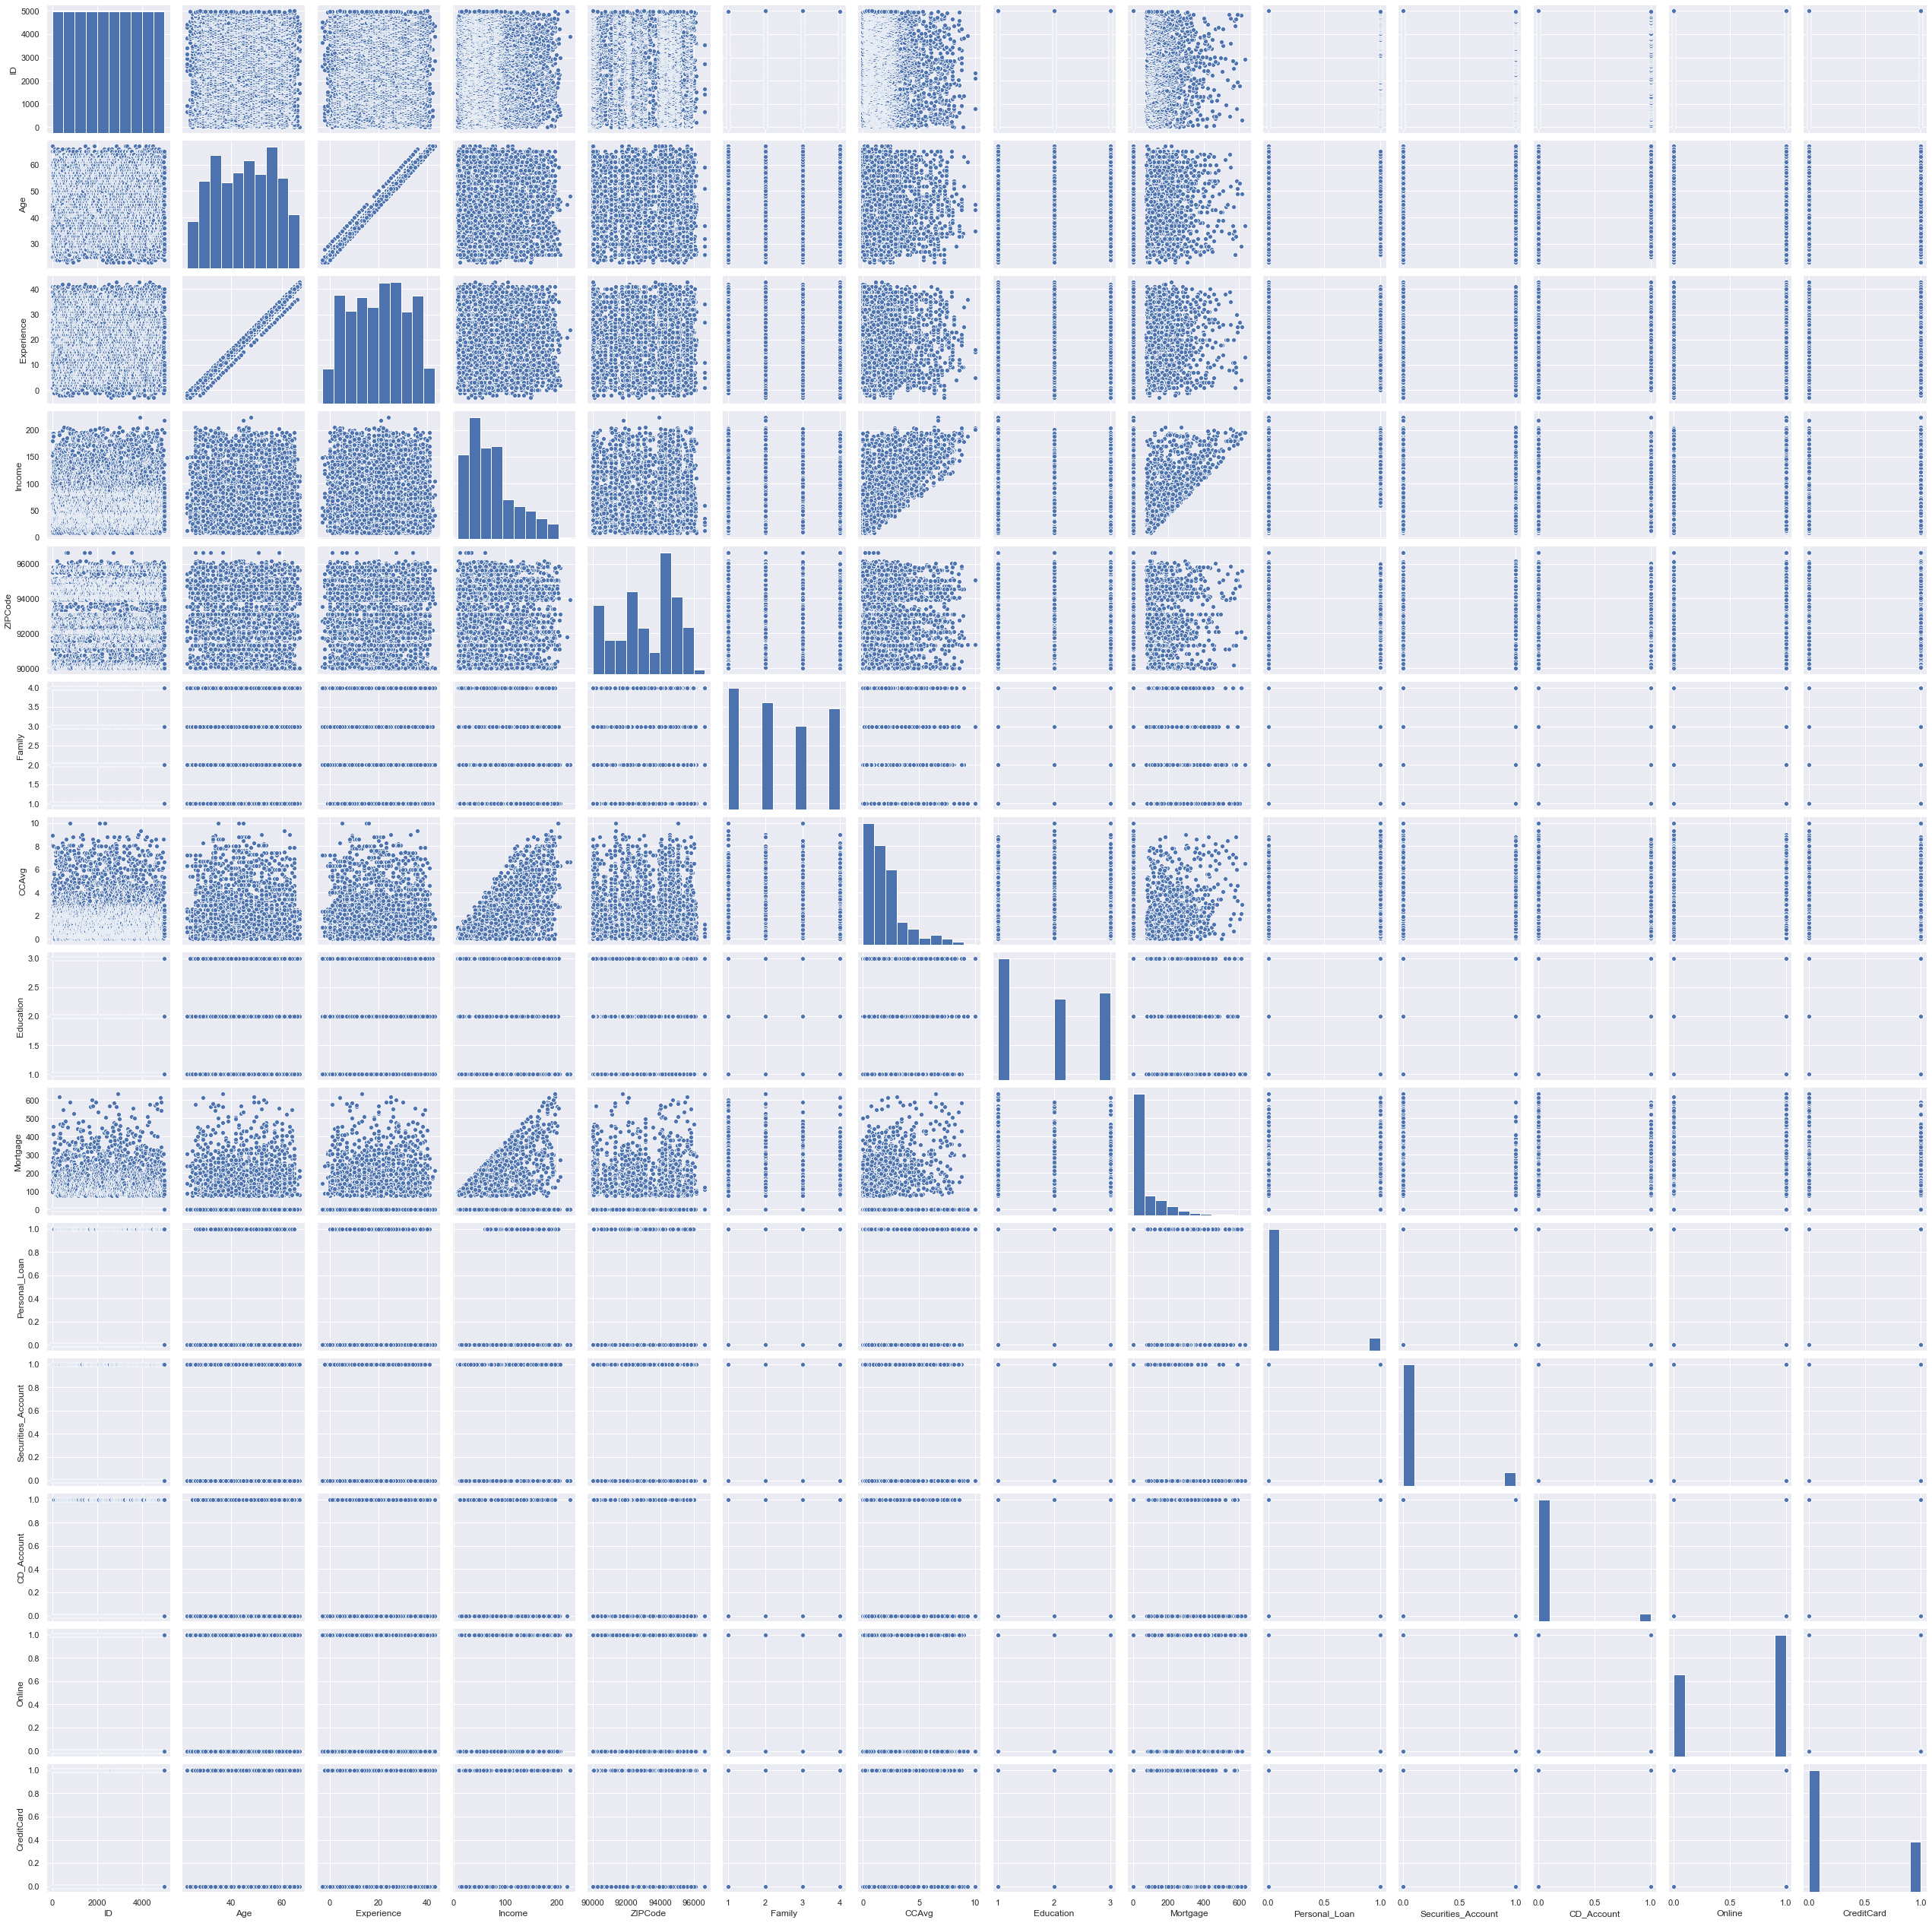

In [217]:

sns.pairplot(data)  # check for pairplot to see any linearity

### Heatmap gives same result as above. Above plot is pictorial representation of heatmap of correlation of various variables

# Models
### Let us build various Models using Logistic regression, decission tree, maximum depth decission tree, hyperparameter decission tree and Decission tree Post Pruning

In [96]:
X = data.drop(['Personal_Loan'], axis=1) # drop Personal_Loan from X variables
Y = data['Personal_Loan'] # Personal_Loan will be our Y variable(Dependent variable)

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1)

In [97]:
print('Shape of Training set : ',X_train.shape )
print('Shape of test set : ',X_test.shape )
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True))
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 13)
Shape of test set :  (1500, 13)
Percentage of classes in training set:
 0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
 0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


### We have about 3500 rows in test and 1500 rows in train data. roughly 90% are customers don't have Personal_Loan and roughly about 9.5% do have personal Loans in Train and Test data

In [98]:
#Let us use the function that was taught during previous module to to get various test scores in Logistic Regression
def get_metrics_score(model,train,test,train_y,test_y,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    train, test: Independent features
    train_y,test_y: Dependent variable
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = (model.predict_proba(train)[:,1]>threshold)
    pred_test = (model.predict_proba(test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(train)[:,1]
        pred_test_prob = model.predict_proba(test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(train_y,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [99]:
#Let us use the function that was taught during previous module to get Confusion Matrix in Logistic Regression
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    test_X: test set
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[1,0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - 1","Actual -0"]],
                  columns = [i for i in ['Predicted - 1','Predicted - 0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\p00137247\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


Accuracy on training set :  0.9505714285714286
Accuracy on test set :  0.946
Recall on training set :  0.622356495468278
Recall on test set :  0.5704697986577181
Precision on training set :  0.8110236220472441
Precision on test set :  0.8333333333333334
F1 on training set :  0.7042735042735043
F1 on test set :  0.6772908366533864


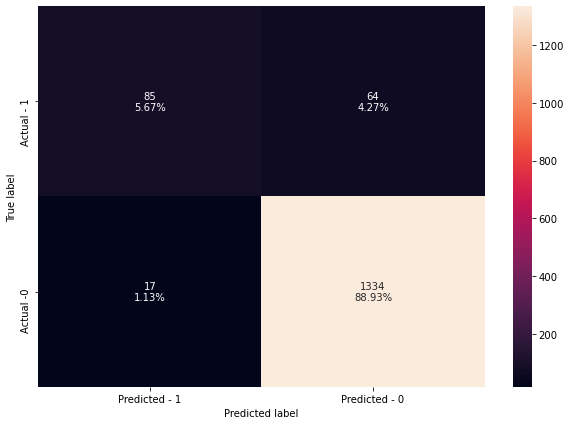

In [100]:
#Logistic regression model
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data let us use that

lg = LogisticRegression(solver='newton-cg',random_state=1)
model  = lg.fit(X_train,y_train)

# checking model performances for this model
scores_LR = get_metrics_score(model,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)


### We have about 1.13% false Positive and 4.27% of false Negative. Type 2 error percentage is high
### Accuracy in training and test data is about 95%
### Recall percentage is bit low with 62% in training and 57% in testing
### F1 score  percentage is bit low with 70% in training and 67% in testing

## Decission Tree models

In [101]:
# Let us import Decisiotreeclasifier and tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [102]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) # gini criterion for classifier
dTree.fit(X_train, y_train) # Build Decission tree train model

DecisionTreeClassifier(random_state=1)

In [103]:
print("Accuracy on training set : ",dTree.score(X_train, y_train)) # Accuracy on Train data
print("Accuracy on test set : ",dTree.score(X_test, y_test)) # Accuracy on Test data

Accuracy on training set :  1.0
Accuracy on test set :  0.9793333333333333


In [104]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - 0","Actual - 1"]],
                  columns = [i for i in ['Predicted - 0','Predicted - 1']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [105]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

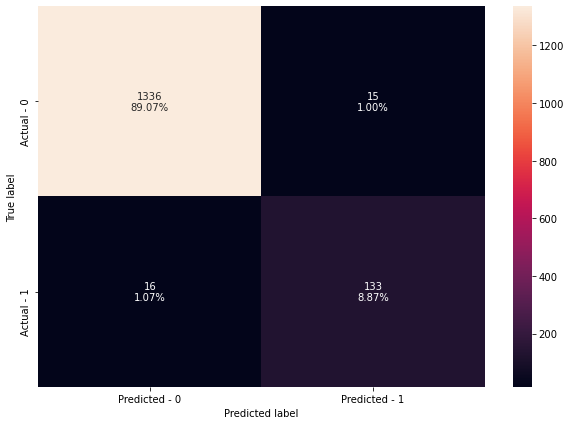

In [106]:
make_confusion_matrix(dTree,y_test) # Buid Confusion matrix for Decision Tree

### We have about 1.00% false Positive and 1.07% of false Negative. 

In [107]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8926174496644296


### Recall percentage is 100% in training and 89% in testing

In [108]:
feature_names = list(X.columns)
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


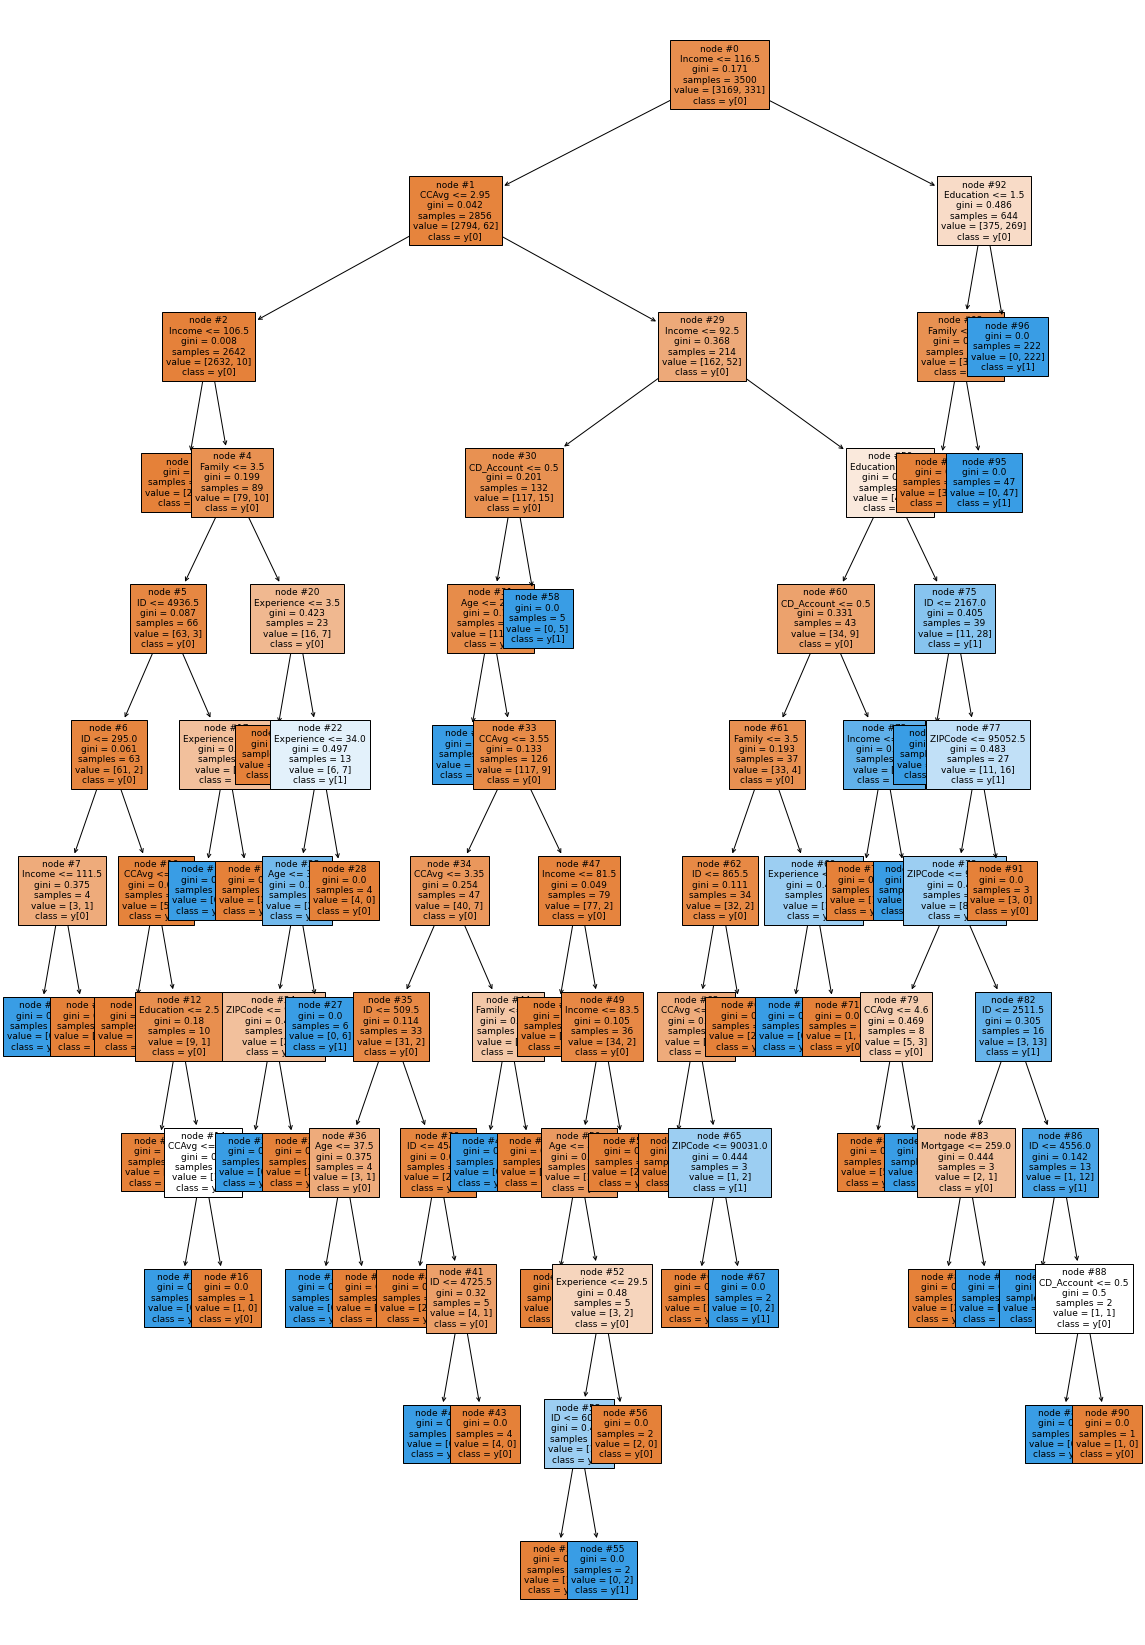

In [109]:
# Let us see tree to get an Idea of overfitting
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [235]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Income                0.297816
Education_2           0.238066
Education_3           0.166724
Family_3              0.095036
Family_4              0.062971
CCAvg                 0.047465
CD_Account_1          0.026348
Experience            0.022695
ID                    0.018641
Age                   0.012337
Mortgage              0.007175
ZIPCode               0.002503
Family_2              0.002224
Securities_Account_1  0.000000
Online_1              0.000000
CreditCard_1          0.000000


## Decission Tree with Depth=3

In [110]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

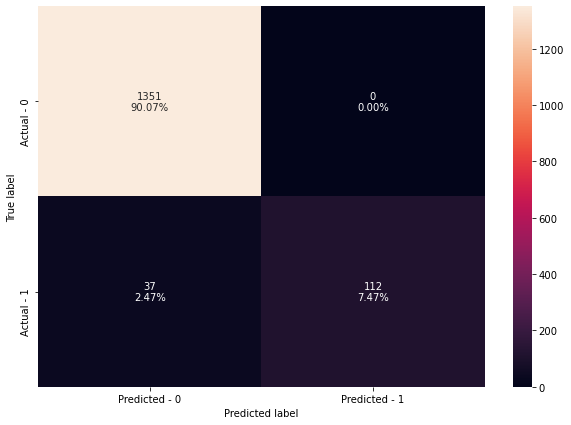

In [111]:
make_confusion_matrix(dTree1, y_test)

### We have about 0% false Positive and 2.47% of false Negative. 

In [113]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.9822857142857143
Accuracy on test set :  0.9753333333333334
Recall on training set :  0.8126888217522659
Recall on test set :  0.7516778523489933


### Recall percentage is 81% in training and 75% in testing
### Accuracy in training is 98% and Testing 97%

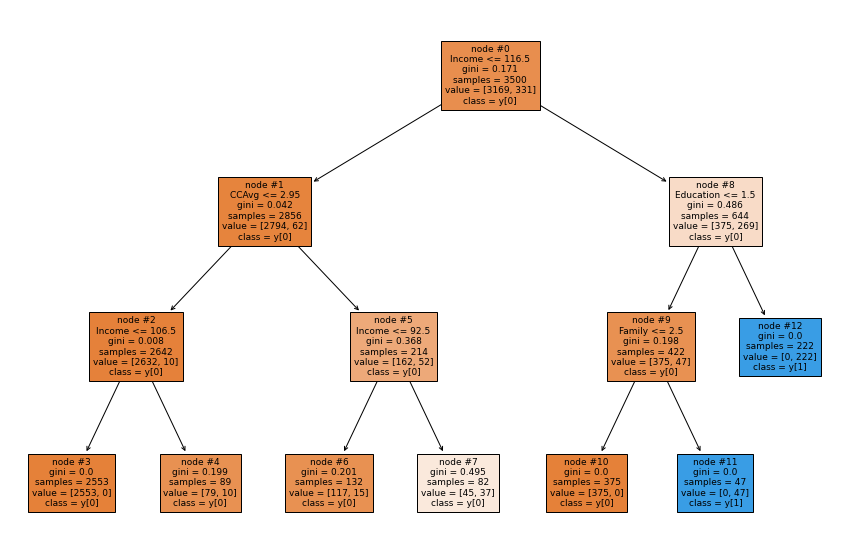

In [114]:
#Let us see Tree with Depth =3
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [115]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.446593
Income              0.346997
Family              0.162372
CCAvg               0.044038
ID                  0.000000
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
CD_Account          0.000000
Online              0.000000
CreditCard          0.000000


### Education, income, Family and CCAVg are extremely important in predicting potential customers who may have Personal Loan

## Decission tree with Hyperparameters

In [116]:
from sklearn.model_selection import GridSearchCV

In [117]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

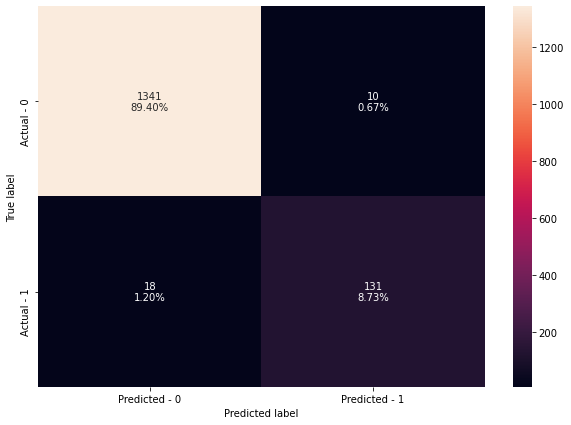

In [118]:
make_confusion_matrix(estimator,y_test)

### We have about 0.67% false Positive and 1.20% of false Negative.

In [261]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.9868571428571429
Accuracy on test set :  0.9746666666666667
Recall on training set :  0.8821752265861027
Recall on test set :  0.7919463087248322


### Decission tree with Post Pruning


In [141]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [142]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000187,0.000562
2,0.000223,0.001676
3,0.000264,0.002203
4,0.000268,0.003277
5,0.000269,0.004351
6,0.000359,0.005427
7,0.000381,0.005808
8,0.000381,0.006189
9,0.000381,0.006570


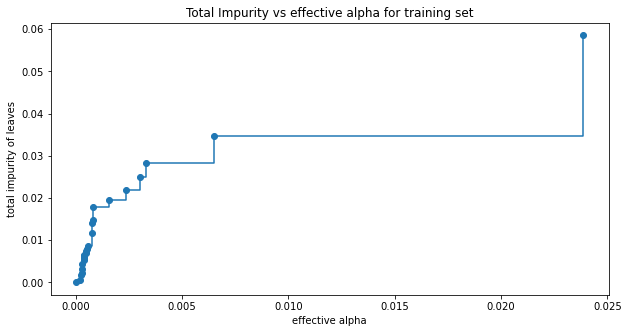

In [143]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [144]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


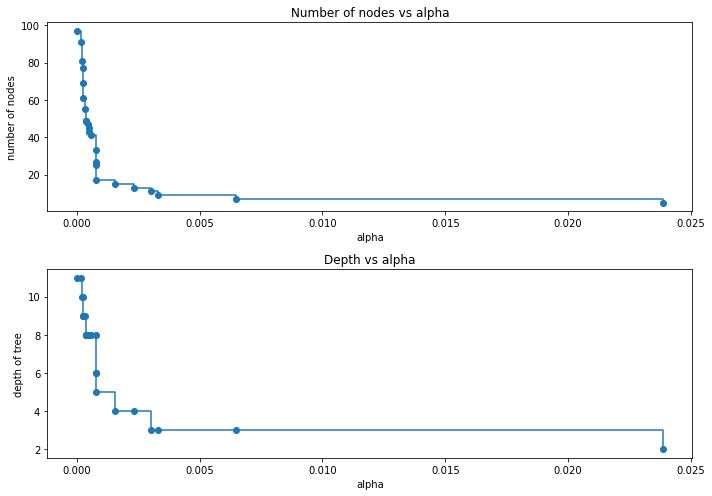

In [145]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [146]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

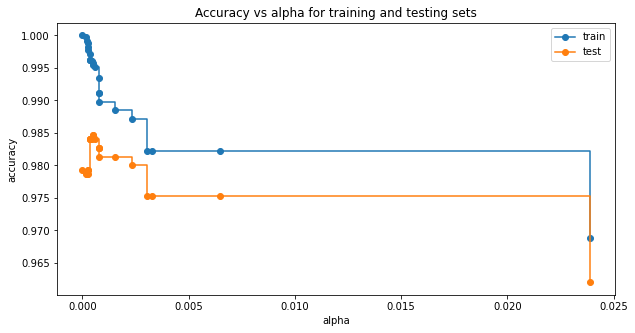

In [147]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [148]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.00048443223443223483, random_state=1)
Training accuracy of best model:  0.9957142857142857
Test accuracy of best model:  0.9846666666666667


In [149]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [150]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

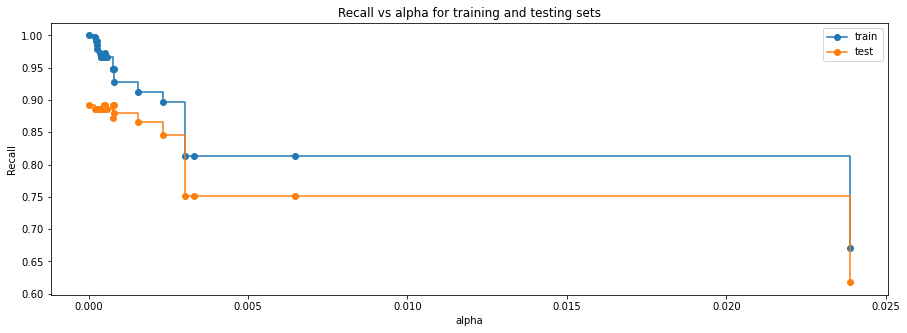

In [151]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [152]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


In [154]:


print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                         Imp
Education           0.402286
Income              0.304042
Family              0.157297
CCAvg               0.053165
CD_Account          0.024352
ID                  0.017656
Experience          0.017286
ZIPCode             0.011810
Age                 0.009880
Mortgage            0.002224
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


## Education, income, Family and CCAVg are extremely important in predicting potential customers who may have Personal Loan

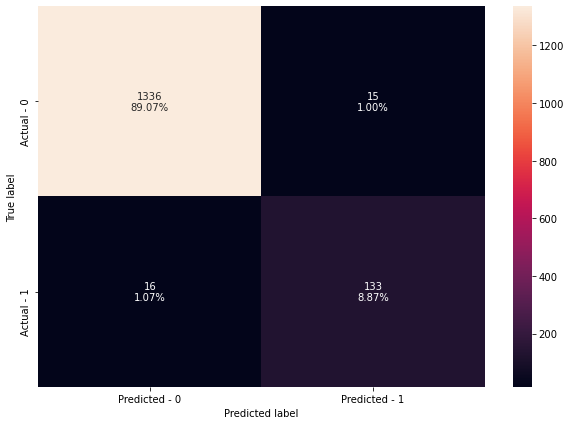

In [131]:
make_confusion_matrix(best_model,y_test)

### We have about 1% false Positive and 1.07% of false Negative.

In [133]:
# Recall on train and test
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.8926174496644296


### Decession tree post pruned has high recall of 100% on train set and 89% on test set
### Decession tree model and Decession tree post pruned have similar recall but we were overfitting initially and we are saving resources with pruning technique.

## Few other observation and conclusion
## It is good to concentrate in zip code between 94000 and 96000 as the customer base is high and company might have more potential Loan takers
## Company can use the data and insight on CCAvg, Family, education Level and expand business and find potential Loan takers outside California
## Company can have more potential Loan takers who have CCAvg close to 4
## With decession tree we have built a model that can definitely predict customers with Personal loan when other parameters are given with high accuracy and recall.
## Education, income, Family and CCAVg are extremely important in predicting potential customers who may have Personal Loan


